# Data Exploration: Spreadsheet からデータを持ってくる

![Alt text](https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week06/images/csv%20to%20map.png)

先週の課題では一つの地図に複数のマーカーを作りましたね。作る過程で、おそらくマーカーを一つ一つコーディングをしたのではないでしょうか。

```python
# from Chikashi's homework
kaede = [35.83304899572845, 139.9550263688704]
asunaro = [35.83218389343381, 139.9559046419524]
hiiragi = [35.83432746243043, 139.95492044150396]
library = [35.83288620720931, 139.9560383893833]
parking = [35.83477548217266, 139.9561361979999]
bukastu = [35.83480867733186, 139.95489801198133]
```

でも、もし100個のマーカーを地図に載せるように言われたらどうする？大変だね！コーディングでやると要領が悪いので、データをspreadsheetで作って、Pythonでインポートしましょう。

## CSV ファイルのインポート

Google Sheetで作ったデータは[こちらでアクセス](https://docs.google.com/spreadsheets/d/1gtQqvep0ULTZ3K1W8fpZoO9ovTg5DfMN3wx1l6Bebcw/edit?usp=sharing)。

では、`mydata.csv`　ファイルをインポートしましょう。クラスのサイトからダウンロードするか、上のファイルを csv としてダウンロードする。

確認！
- `mydata.csv` ファイルがこのノートブックファイルと同じルーツであることを再確認


### Library import

モジュールを三つ使います：
- pandas: to import and work with dataframes
- folium: to create interactive maps
- matplotlib: to create charts

In [1]:
# library import
import pandas as pd
import folium
import matplotlib.pyplot as plt

このようにデータを取り込みます。ちなみに `df` は 【dataframe】の略：

In [2]:
# import the csv file
df = pd.read_csv('mydata.csv')

In [3]:
df

,name,description,latitude,longitude,color
0,校舎「かえで」,校舎名の「かえで」には「楓の果実が2つの種子が密着した姿で、それぞれから翼が伸びる翼果である...,35.833049,139.955026,green
1,校舎「あすなろ」,"麗澤大学開学50周年記念事業の一環として2011年4月""森と共生するキャンパス""をコンセプト...",35.832201,139.955906,green
2,図書館,AVホール・CALL教室を持ち、授業開講時は8:50から19:00（閉講期間中は9:00から...,35.832862,139.955925,green
3,学生会館「ひいらぎ」,2022年9月にリニューアルオープン。木目とグリーンを基調としたアットホームな雰囲気で、窓か...,35.834304,139.954985,cadetblue
4,麗澤大学生涯教育プラザ,2006年（平成18年）2月竣工。大学院、研究センター、情報システム部、麗澤オープンカレッジ...,35.831934,139.956880,green
5,校舎「さつき」,"<img src=""https://www.reitaku-u.ac.jp/news/ima...",35.834119,139.956113,darkred
6,Minami Kashiwa Station,The coolest station in the world (not!),35.844828,139.954332,red


## Working with dataframes

おめでとう！データの取り込みに成功。それでは基本的なデータを explore するコマンドをいくつか紹介。

In [4]:
# size of the data (rows, columns)
df.shape

(7, 5)

In [5]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7 non-null      object 
 1   description  7 non-null      object 
 2   latitude     7 non-null      float64
 3   longitude    7 non-null      float64
 4   color        7 non-null      object 
dtypes: float64(2), object(3)
memory usage: 408.0+ bytes


↑ここで確認するのは `latitude` and `longitude` が `float` であること。もし `object` であればデータを作り直す必要がある。

In [6]:
# list of columns
df.columns.to_list()

['name', 'description', 'latitude', 'longitude', 'color']

In [9]:
# show only specific columns
df[['name','latitude','longitude']]

,name,latitude,longitude
0,校舎「かえで」,35.833049,139.955026
1,校舎「あすなろ」,35.832201,139.955906
2,図書館,35.832862,139.955925
3,学生会館「ひいらぎ」,35.834304,139.954985
4,麗澤大学生涯教育プラザ,35.831934,139.956880
5,校舎「さつき」,35.834119,139.956113
6,Minami Kashiwa Station,35.844828,139.954332


In [12]:
# get values for a single column
df['color']

0        green
1        green
2        green
3    cadetblue
4        green
5      darkred
6          red
Name: color, dtype: object

In [13]:
# put those values in a list
df['latitude'].to_list()

[35.833049,
 35.83220147,
 35.83286248,
 35.83430366,
 35.83193431,
 35.83411942,
 35.84482836]

### Charts

`matplotlib` を使ってグラフを作成。

<AxesSubplot: >

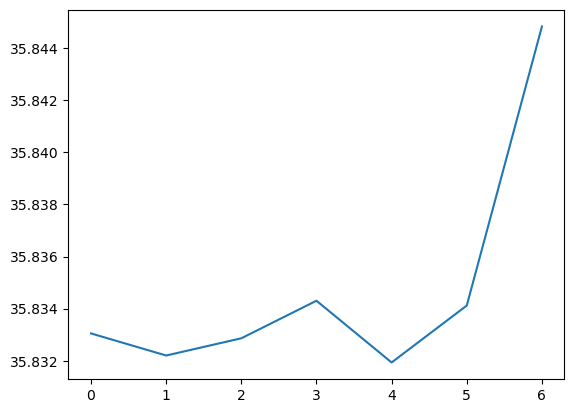

In [14]:
# line chart
df['latitude'].plot()

全く意味のないものを作ってしまったね〜🤦。では、箱ヒゲ図は？

<AxesSubplot: >

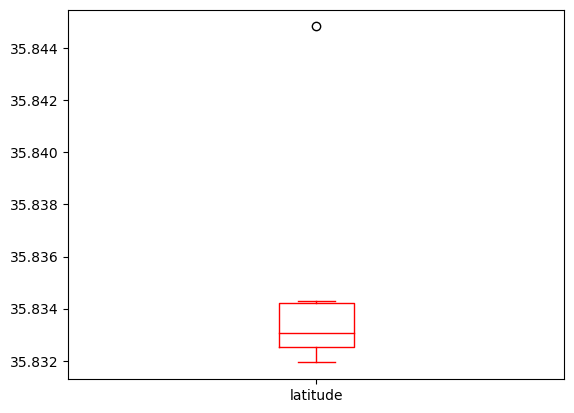

In [15]:
# boxplot 箱ヒゲ図
df['latitude'].plot.box(color='red')

箱ヒゲ図も微妙？では棒グラフは？

<AxesSubplot: >

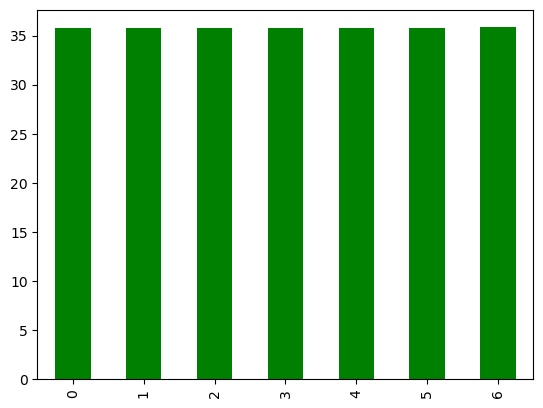

In [16]:
# bar graph
df['latitude'].plot.bar(color='green')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

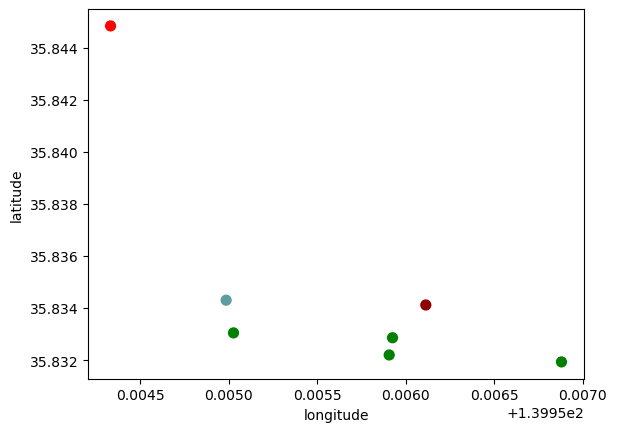

In [17]:
# scatterplot 散布図
# ここの 'c' は df の変数の 'color' を指定
# size(s) を変えてみよう
df.plot.scatter(x='longitude',y='latitude',c='color',s=50)

### Statistics

Pythonは簡単な統計もできます。

In [19]:
# summary stats
df['longitude'].describe()

count      7.000000
mean     139.955595
std        0.000858
min      139.954332
25%      139.955006
50%      139.955906
75%      139.956019
max      139.956880
Name: longitude, dtype: float64

In [20]:
# summary stats
df['longitude'].describe()

count      7.000000
mean     139.955595
std        0.000858
min      139.954332
25%      139.955006
50%      139.955906
75%      139.956019
max      139.956880
Name: longitude, dtype: float64

In [21]:
# mean 平均値
df['latitude'].mean()

35.83475695714286

In [22]:
# median 中央値
df['latitude'].median()

35.833049

### 【チャレンジ問題】
では統計を使って、`latitude` and `longitude` の平均値を変数に入れましょう。

さて、この平均値は何を意味するのでしょうか？

In [24]:
# complete the following code:
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

print(center_lat, center_lon)

35.83475695714286 139.9555954142857


## Let's loop!

プログラミングの基礎の一つである　`for loop`　があります。「ループ」の言葉通り、何かを【繰り返す】という意味である。


In [30]:
numbers = [1,2,3,4,10,100]

# print each number in the list
for num in numbers:
    print(num)
    print(num*num)

1
1
2
4
3
9
4
16
10
100
100
10000


### 【チャレンジ問題】
`for loop`を使って名前をプリントしよう。

In [33]:
# my students
students = ['Saki','Yuji','Kakan','Reo','Misuzu','Jinjie','Sakura','Hiyori','Yuki','Takato']

# print their names
for name in students:
    print('My name is',name)


My name is Saki
My name is Yuji
My name is Kakan
My name is Reo
My name is Misuzu
My name is Jinjie
My name is Sakura
My name is Hiyori
My name is Yuki
My name is Takato


さて、この「ループ」の概念を使ってデータ `df` の１行ずつアウトプットするには `iterrows()` メソッドを使う。例えば、データの `name` を全部アウトプットするには：

In [34]:
# loop through your data
for index, row in df.iterrows():
    print(row['name'])

校舎「かえで」
校舎「あすなろ」
図書館
学生会館「ひいらぎ」
麗澤大学生涯教育プラザ
校舎「さつき」
Minami Kashiwa Station


このように、`row` の変数は【各行】を意味するので、`for loop` に入っているときは変数名と共に各行の値をアウトプットすることができる。複数の変数をアウトプットも可能：

In [35]:
# loop and output multiple column values
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

校舎「かえで」 35.833049 139.9550264
校舎「あすなろ」 35.83220147 139.9559064
図書館 35.83286248 139.9559251
学生会館「ひいらぎ」 35.83430366 139.9549849
麗澤大学生涯教育プラザ 35.83193431 139.9568801
校舎「さつき」 35.83411942 139.9561133
Minami Kashiwa Station 35.84482836 139.9543317


### Use the loop in a map

それでは、`for loop` を使って、`df` のポイントを一気にマッピングしよう。

In [36]:
# make the map
m = folium.Map(location=[center_lat,center_lon], zoom_start=17)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color']
                )).add_to(m)

# show the map
m

`popup` の値に注目！そうなんです。日本語のテキストだと、popupが縦に表示されるため、これを回避するにはテキストの周りにHTMLで強引に `width` を設定します。

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week06/images/tate%20to%20yoko.png" width="400">

### Basemap 色々

デフォルトで使うベースマップは Open Street Map から。でも他にもオプションがいっぱいある。`folium` でマップを作るときに `tiles` と `attr` を指定することによってベースマップの変更が可能になる。

日本では国土交通省の国土地理院が様々なベースマップを提供している。以下のURLを `tiles` 変数に指定する。`attr` は `attribute` の略なので、必ず出所を指定する。この場合は `attr="国土地理院"`

2007年以降
- https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg

1987年～1990年
- https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg

1984年～1986年
- https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg

1979年～1983年
- https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg

1974年～1978年
- https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg

1961年～1969年
- https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png


In [37]:
# make the map
m = folium.Map(location=[center_lat,center_lon], 
               zoom_start=17,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='2007年以降',tiles='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1987年～1990年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1984年～1986年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1979年～1983年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1974年～1978年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1961年～1969年',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)

# basemapが選べるボタンをマップに足す
folium.LayerControl().add_to(m)

# add points
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, popup='<div style="width:150px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)

# show the map
m



このように同じ「場所」を違う視点から観察することができる。これを見て、何を感じますか？

# 今週の課題（月曜日までに提出）

1. 位置データを含む独自の .csv ファイルを作成 (latitude/longitudeの座標が必要)
1. VSCodeを開く
1. `week6`フォルダーを作成
1. `week6`フォルダーの中に新しいファイル`week6HW.ipynb`を作成
1. あなたのマップを説明するマークダウン テキストを書く (例: 「広島: 思い出の場所」、「アニメ ジャパン ツアー」)
1. CSVデータをインポート
1. CSV データ上の位置を示すfoliumマップを作成
1. マップを保存 `m.save("map.html")`
1. GitHub にコミット
1. `map.html`へのURLリンクをUNIPAに提出（例：https://yohman.github.io/GIS/week6/map.html）


# Extra topic: Mapping Earthquakes

世界の地震のデータをリアルタイムで提供しているのは United States Geological Survey (USGS)。このデータをcsv fileとしてダウンロードできるが、直接アクセスすることも可能である。この場合、 `csv` ではなく `geojson` というファイルフォーマットを使う。`geojson` はこれからも使うので、とりあえず、ここで紹介！

`geojson` を扱うには新しいライブラリー【geopandas】を使う必要がある。

[USGSの地震マップ](https://earthquake.usgs.gov/earthquakes/map/?extent=-82.76537,-120.23438&extent=84.9593,298.47656)

In [38]:
import geopandas as gpd

`geopandas` を使ってUSGSからのリアルタイムデータを読み込む。`gdf` とは `geodataframe` の略である。

In [39]:
gdf = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson')

In [44]:
# use head to output first 5 rows
gdf.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,types,nst,dmin,rms,gap,magType,type,title,geometry,time2
0,tx2024kkpd,3.00,"17 km NE of Hermleigh, Texas",1716862897883,1716863578351,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",origin,phase-data,",13.0,0.1000,0.10,80.0,ml,earthquake,"M 3.0 - 17 km NE of Hermleigh, Texas",POINT Z (-100.64200 32.75800 7.54390),1970-01-01 00:28:36.862897883
1,pr71450628,3.04,"14 km WNW of Rincón, Puerto Rico",1716862082470,1716863249620,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",origin,phase-data,",18.0,0.2554,0.26,143.0,md,earthquake,"M 3.0 - 14 km WNW of Rincón, Puerto Rico",POINT Z (-67.37617 18.37867 6.53000),1970-01-01 00:28:36.862082470
2,tx2024kkoq,2.90,"54 km NW of Toyah, Texas",1716861970953,1716863021289,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",origin,phase-data,",11.0,0.1000,0.10,70.0,ml,earthquake,"M 2.9 - 54 km NW of Toyah, Texas",POINT Z (-104.19300 31.66800 7.68920),1970-01-01 00:28:36.861970953
3,tx2024kkoo,3.90,"56 km NW of Toyah, Texas",1716861876028,1716864470723,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,2.0,...,",dyfi,origin,phase-data,shakemap,",30.0,0.1000,0.20,69.0,ml,earthquake,"M 3.9 - 56 km NW of Toyah, Texas",POINT Z (-104.20100 31.68100 8.04810),1970-01-01 00:28:36.861876028
4,us6000n1d8,4.50,"136 km SE of Bitung, Indonesia",1716859894668,1716860769040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",origin,phase-data,",30.0,5.2280,0.79,92.0,mb,earthquake,"M 4.5 - 136 km SE of Bitung, Indonesia",POINT Z (125.98120 0.55400 35.00000),1970-01-01 00:28:36.859894668


In [42]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        47 non-null     object  
 1   mag       47 non-null     float64 
 2   place     47 non-null     object  
 3   time      47 non-null     int64   
 4   updated   47 non-null     int64   
 5   tz        0 non-null      float64 
 6   url       47 non-null     object  
 7   detail    47 non-null     object  
 8   felt      8 non-null      float64 
 9   cdi       8 non-null      float64 
 10  mmi       6 non-null      float64 
 11  alert     1 non-null      object  
 12  status    47 non-null     object  
 13  tsunami   47 non-null     int64   
 14  sig       47 non-null     int64   
 15  net       47 non-null     object  
 16  code      47 non-null     object  
 17  ids       47 non-null     object  
 18  sources   47 non-null     object  
 19  types     47 non-null     object  
 20  nst 

In [43]:
# display time as a datetime
gdf['time2'] = pd.to_datetime(gdf['time'])

In [41]:
# make the map
eqmap = folium.Map(location=[0,0], 
               zoom_start=1,
               tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
               attr = 'ESRI')

folium.GeoJson(gdf,
               tooltip=folium.GeoJsonTooltip(fields=['place','mag'])).add_to(eqmap)
eqmap

ここで考えほしいのは、csv をダウンロードした場合と、このように直接出所にリンクしてデータを入手する「違い」とは何か？